In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_theme()


data_dir = './data/'
seed = 42

# Load Banksim1

In [2]:
# Load Banksim1
bank_trans = pd.read_csv(f'{data_dir}banksim1/bs140513_032310.csv')
bank_network = pd.read_csv(f'{data_dir}banksim1/bsNET140513_032310.csv')


In [3]:
print(f'Bank Transactions {bank_trans.shape}')
bank_trans.head()

Bank Transactions (594643, 10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
print(f'Bank Network {bank_network.shape}')
bank_network.head()

Bank Network (594643, 5)


,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


# Fraud distribution

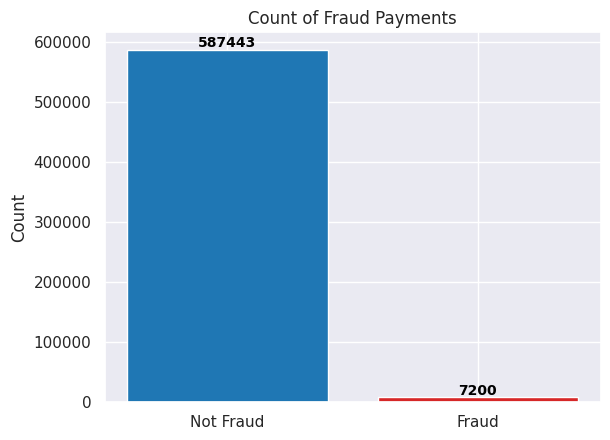

In [5]:
# Fraud 
fraud = bank_trans.fraud.value_counts()
fig, ax = plt.subplots()
bars = ax.bar(['Not Fraud', 'Fraud'],fraud.values, color=['#1f77b4', '#d62728'])

# Add labels to the top of each bar
ax.bar_label(bars, labels=fraud.values, label_type='edge', color='black', fontsize=10, weight='bold')

# Customize the plot
ax.set_ylabel('Count')
ax.set_title('Count of Fraud Payments')
plt.show()

Text(0.5, 1.0, 'Amount Distribution - Max 8329.96')

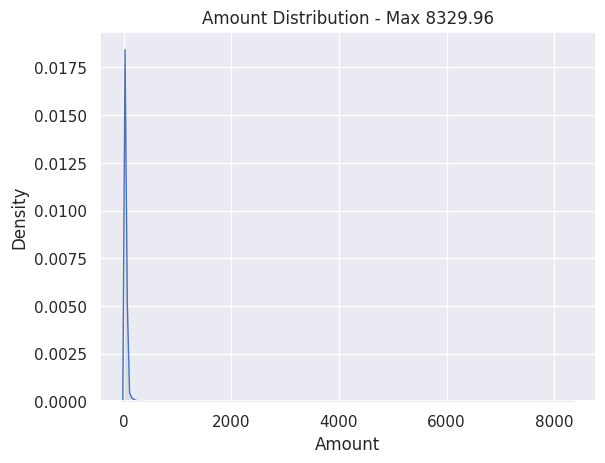

In [6]:
sns.kdeplot(data=bank_trans, x='amount', fill=True, alpha=0.1, linewidth=1)
plt.xlabel('Amount')
plt.ylabel('Density')
max_amount = max(bank_trans.amount)
plt.title(f'Amount Distribution - Max {max_amount}')

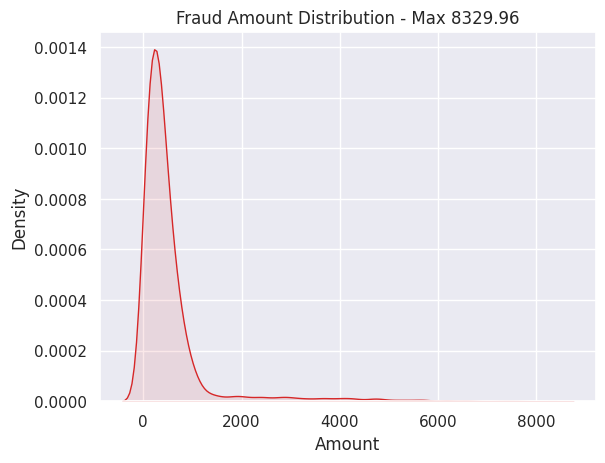

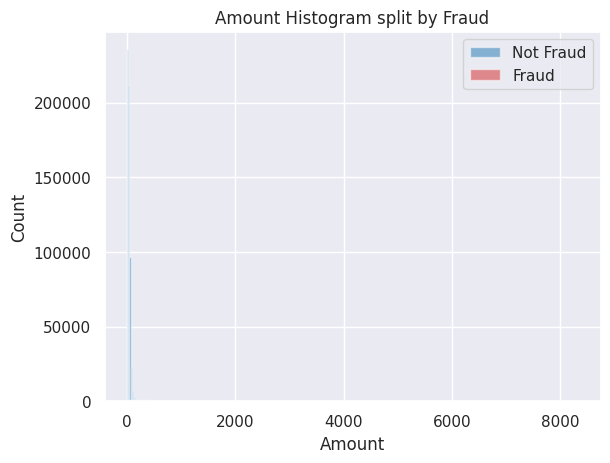

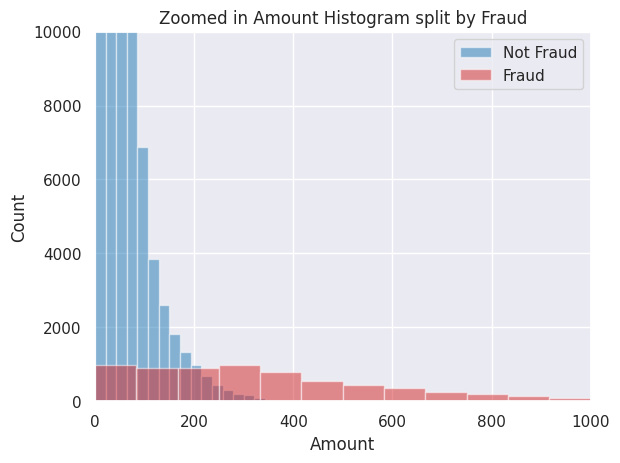

In [7]:
fraud = bank_trans.loc[bank_trans.fraud == 1]
not_fraud = bank_trans.loc[bank_trans.fraud == 0]

sns.kdeplot(data=fraud, x='amount', fill=True, color='#d62728', alpha=0.1, linewidth=1)
plt.xlabel('Amount')
plt.ylabel('Density')
max_amount = max(fraud.amount)
plt.title(f'Fraud Amount Distribution - Max {max_amount}')
plt.show()

plt.hist(not_fraud.amount, alpha=0.5,label='Not Fraud', bins=100, color='#1f77b4')
plt.hist(fraud.amount, alpha=0.5,label='Fraud', bins=100, color='#d62728')
plt.title('Amount Histogram split by Fraud')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.hist(not_fraud.amount, alpha=0.5,label='Not Fraud', bins=100, color='#1f77b4')
plt.hist(fraud.amount, alpha=0.5,label='Fraud', bins=100, color='#d62728')
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.title('Zoomed in Amount Histogram split by Fraud')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend()
plt.show()



# Split Data

In [8]:
def label_encode(data, cat_cols):
    label_encoders = {}
    for col in cat_cols:
        label_encoders[col] = LabelEncoder()
        data[col] = label_encoders[col].fit_transform(data[col])
    return label_encoders

def label_decode(data, encoders):
    for col, encoder in encoders.items():
        data[col] = encoder.inverse_transform(data[col])

# Clean up data
data = bank_trans
print(data.nunique())
data = data.drop(['zipcodeOri', 'zipMerchant'],axis=1) # drop single value columns
data.age = pd.to_numeric(data.age.str.strip("'"), errors='coerce').fillna(-1).astype(int) # convert age to numbers, U's turn into -1's
cat_cols = ['customer', 'gender', 'merchant', 'category']
label_encoders = label_encode(data, cat_cols)

# Split data
X = data.drop(['fraud'], axis=1)
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=seed, shuffle=True, stratify=y)
data.dtypes

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64


step          int64
customer      int64
age           int64
gender        int64
merchant      int64
category      int64
amount      float64
fraud         int64
dtype: object

# Create Random Forest

In [9]:
rand_forest = RandomForestClassifier(random_state=seed)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)

# Train

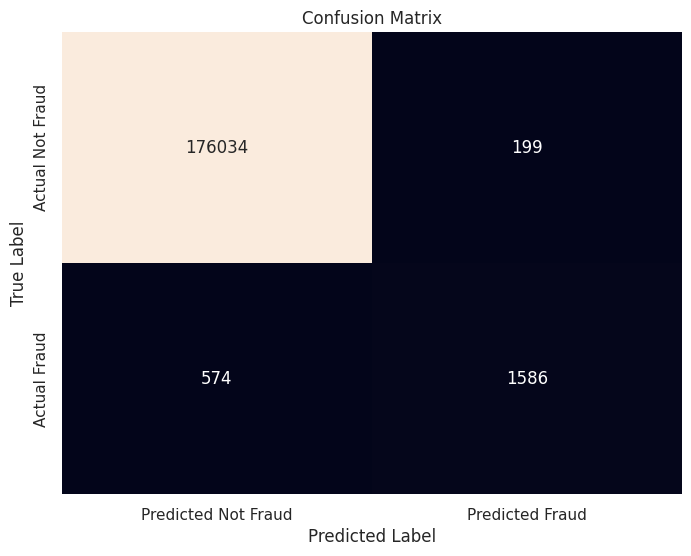

NameError: name 'classification_report' is not defined

In [10]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Not Fraud', 'Actual Fraud'], columns=['Predicted Not Fraud', 'Predicted Fraud'])

# Plot the heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_test,y_pred))


# Evaluate Results